In [1]:
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### We load in the data using all the columns, and we delete the outliers

In [2]:
# The columns that we will use 
X_cols = ['S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2', 'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11', 'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18', 'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21', 'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73', 'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25', 'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10', 'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13', 'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18', 'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_20', 'R_21', 'B_33', 'D_89', 'R_22', 'R_23', 'D_91', 'D_92', 'D_93', 'D_94', 'R_24', 'R_25', 'D_96', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'D_102', 'D_103', 'D_104', 'D_105', 'D_106', 'D_107', 'B_36', 'B_37', 'R_26', 'R_27', 'B_38', 'D_108', 'D_109', 'D_110', 'D_111', 'B_39', 'D_112', 'B_40', 'S_27', 'D_113', 'D_114', 'D_115', 'D_116', 'D_117', 'D_118', 'D_119', 'D_120', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_127', 'D_128', 'D_129', 'B_41', 'B_42', 'D_130', 'D_131', 'D_132', 'D_133', 'R_28', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145']

In [3]:
# The columns that are outliers
get_rid_of_columns = ['B_5','D_49','B_6','D_50', 'S_5','B_12', 'B_13','D_65', 'S_12','D_69',
                    'B_26','B_27','R_14', 'R_18','S_23','S_26','D_106', 'B_40','D_123'] 

In [4]:
# The columns that we will not use 
not_use_columns = ['S_2','B_30','B_38','D_114','D_116','D_117','D_120','D_126','D_63','D_64','D_66','D_68']

In [5]:
# For loop for removing the columns
for removing in get_rid_of_columns:
    X_cols.remove(removing)

In [6]:
# For loop for removing columns that we will not need
for removing_ in not_use_columns:
    X_cols.remove(removing_)

In [7]:
len(X_cols) # We have removed 31 colums which is not_use_columns + get_rid_of_columns length

158

### We will now load in the data

In [8]:
chunksize = 1000000 # How much of the data to load in

# Load in using X_cols and customer_ID
train_df_iter = pd.read_csv("train_data.csv", chunksize=chunksize, usecols=["customer_ID"] + X_cols)


train_df = pd.DataFrame()
for i_chunk, chunk in enumerate(train_df_iter): # i_chunk is the index of the chunk, and chunk is the actual data
    train_df = pd.concat([train_df, chunk]) # adding it to train_df which is an empty dataframe
    print(train_df.shape)

(1000000, 159)
(2000000, 159)
(3000000, 159)
(4000000, 159)
(5000000, 159)
(5531451, 159)


In [9]:
train_df_labels = pd.read_csv("train_labels.csv")

##### Light EDA

In [10]:
train_df.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,5.485466e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.529435e+06,5.529435e+06,791314.000000,3.873055e+06,...,1.946990e+05,1.946990e+05,1.946990e+05,5.429903e+06,5.490819e+06,5.429903e+06,944408.000000,5.429903e+06,5.490724e+06,5.429903e+06
mean,6.563340e-01,1.531172e-01,1.240100e-01,6.214887e-01,7.880270e-02,2.258455e-01,5.978469e-02,1.325389e-01,0.184974,1.546841e-01,...,2.427725e-01,1.424409e-02,1.646183e-01,1.789305e-01,2.664348e-02,1.645212e-01,0.390799,1.788022e-01,5.238952e-02,6.233496e-02
std,2.446494e-01,2.700709e-01,2.119869e-01,4.014877e-01,2.263971e-01,1.933475e-01,2.025443e-01,2.349929e-01,0.228185,2.133977e-01,...,2.101320e-01,9.571115e-02,2.670208e-01,3.790614e-01,1.455480e-01,3.482771e-01,0.236182,3.789498e-01,1.825135e-01,1.934937e-01
min,-4.589548e-01,5.026190e-09,-7.588799e+00,9.192280e-09,1.534223e-09,-6.271320e-01,5.566545e-10,6.285293e-09,-0.000454,1.154550e-07,...,6.316773e-08,1.078787e-08,3.307923e-08,3.767347e-10,3.725073e-09,1.650100e-10,-0.014539,5.549692e-09,2.500991e-09,1.226024e-09
25%,4.803307e-01,4.528464e-03,8.863645e-03,1.053313e-01,2.895934e-03,1.272588e-01,2.873244e-03,5.227570e-03,0.037516,4.227546e-02,...,9.314305e-03,2.532470e-03,3.517452e-03,3.027212e-03,2.555848e-03,3.026087e-03,0.199399,3.028116e-03,2.752896e-03,3.028347e-03
50%,6.942950e-01,9.056902e-03,3.132968e-02,8.143328e-01,5.782230e-03,1.639082e-01,5.746725e-03,9.777230e-03,0.120519,8.851245e-02,...,2.539468e-01,5.069830e-03,7.037814e-03,6.053010e-03,5.110523e-03,6.051590e-03,0.382136,6.053151e-03,5.508129e-03,6.053248e-03
75%,8.648159e-01,2.366407e-01,1.259019e-01,1.002403e+00,8.660590e-03,2.581017e-01,8.615665e-03,1.550507e-01,0.250869,1.843206e-01,...,2.582450e-01,7.573434e-03,5.015468e-01,9.080455e-03,7.663697e-03,9.078915e-03,0.559308,9.076287e-03,8.260447e-03,9.080930e-03
max,1.010000e+00,5.389619e+00,1.324060e+00,1.010000e+00,3.256284e+00,5.482888e+00,8.988807e+00,1.625262e+00,4.191119,1.011162e+01,...,1.759910e+00,1.009998e+00,3.005383e+00,1.010000e+00,1.010000e+00,1.339910e+00,2.229368,1.010000e+00,1.343331e+00,4.827630e+00


(array([5.458903e+06, 5.980000e+04, 8.737000e+03, 1.491000e+03,
        3.390000e+02, 1.140000e+02, 2.800000e+01, 1.700000e+01,
        5.000000e+00, 1.000000e+00]),
 array([5.56654507e-10, 8.98880704e-01, 1.79776141e+00, 2.69664211e+00,
        3.59552281e+00, 4.49440352e+00, 5.39328422e+00, 6.29216492e+00,
        7.19104563e+00, 8.08992633e+00, 8.98880703e+00]),
 <BarContainer object of 10 artists>)

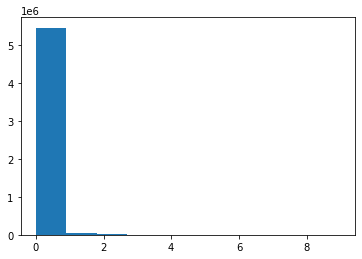

In [11]:
plt.hist(train_df["D_41"]) # The D_ have majority positive numbers

(array([2.260000e+02, 6.079000e+03, 3.795900e+04, 1.002180e+05,
        2.581140e+05, 6.366660e+05, 8.808930e+05, 9.694700e+05,
        1.207461e+06, 1.388380e+06]),
 array([-0.45895483, -0.31205936, -0.16516388, -0.0182684 ,  0.12862708,
         0.27552256,  0.42241804,  0.56931351,  0.71620899,  0.86310447,
         1.00999995]),
 <BarContainer object of 10 artists>)

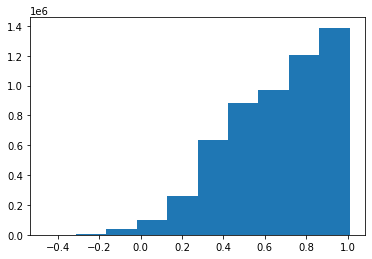

In [12]:
plt.hist(train_df["P_2"]) # The P_ (spending) are majority increasing and a steady rate

(array([1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 4.000000e+00, 3.500000e+01,
        5.037944e+06, 4.934660e+05]),
 array([-7.5887991 , -6.69751315, -5.8062272 , -4.91494125, -4.0236553 ,
        -3.13236935, -2.2410834 , -1.34979745, -0.4585115 ,  0.43277445,
         1.3240604 ]),
 <BarContainer object of 10 artists>)

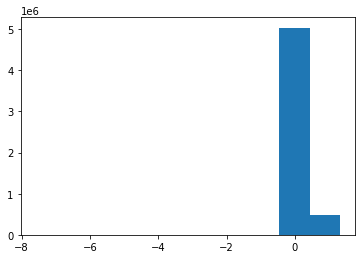

In [13]:
plt.hist(train_df["B_1"]) # Between -1 and 1

### We will join the data with the labels and make it smaller by using the .groupby().last().reset_index()

In [14]:
train_df = train_df.groupby("customer_ID")[X_cols].last().reset_index() # reset the index from (5531451, 159) to (458913, 159)

In [15]:
train_df.shape

(458913, 159)

In [16]:
train_df_labels.shape

(458913, 2)

In [17]:
# fill in the NaN values

print(f"Before fillna {train_df.isna().sum()}")
# Hard fillna (CHECK IF RESULTS ARE BAD)
train_df.fillna(0, inplace = True)

print(f"After fillna {train_df.isna().sum()}")

Before fillna customer_ID         0
P_2              2434
D_39                0
B_1                 0
B_2                31
                ...  
D_141            2532
D_142          373333
D_143            2532
D_144               0
D_145            2532
Length: 159, dtype: int64
After fillna customer_ID    0
P_2            0
D_39           0
B_1            0
B_2            0
              ..
D_141          0
D_142          0
D_143          0
D_144          0
D_145          0
Length: 159, dtype: int64


In [18]:
# merging the data
train_df = pd.merge(train_df, train_df_labels, on="customer_ID", how="left")

In [19]:
train_df

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,0.0,...,0.0,0.0,0.007186,0.004234,0.005086,0.000000,0.005810,0.002970,0.008533,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,0.0,...,0.0,0.0,0.002980,0.007479,0.007870,0.000000,0.003284,0.003169,0.008514,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.880875,0.009704,0.004284,0.812650,0.006450,0.000000,0.003796,0.007196,0.0,...,0.0,0.0,0.007383,0.006623,0.000964,0.000000,0.002202,0.000834,0.003444,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.621776,0.001083,0.012564,1.006183,0.007829,0.287766,0.004532,0.009937,0.0,...,0.0,0.0,0.002704,0.006184,0.001899,0.000000,0.008183,0.005560,0.002983,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.871900,0.005573,0.007679,0.815746,0.001247,0.176403,0.000231,0.005528,0.0,...,0.0,0.0,0.002974,0.004162,0.005764,0.000000,0.008154,0.006944,0.000905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0.844229,0.447585,0.028515,1.009867,0.001928,0.128707,0.003482,0.005893,0.0,...,0.0,0.0,0.007917,0.001520,0.005530,0.000000,0.001430,0.003009,0.004843,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.831279,0.033670,0.292360,0.055656,0.006953,0.194697,0.005791,0.233078,0.0,...,0.0,0.0,0.004393,0.006185,0.001480,0.000000,0.004794,0.009230,0.006435,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0.800522,0.267018,0.020563,1.007023,0.000957,0.066648,0.007424,0.006314,0.0,...,0.0,0.0,0.006035,0.002869,0.002149,0.000000,0.008031,0.000340,0.002148,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0.754129,0.008619,0.015838,0.714486,0.000993,0.408849,0.003392,0.050048,0.0,...,0.0,0.0,1.009894,0.004478,0.949723,0.446255,1.009310,0.002502,0.185527,1


### We will now train_test_split the data

In [20]:
# These are the columns that we will use for the training 
_X_cols = train_df.columns[1:-1] # We get rid of the customer ID and the 
_X_cols.shape

(158,)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df[_X_cols], train_df["target"], test_size = 0.3,
                                                   random_state = 42, stratify = train_df["target"])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((321239, 158), (137674, 158), (321239,), (137674,))

#### Now we will use a larger than average dense model

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dense(200, activation = "relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

2022-06-26 20:48:58.873817: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", 
             metrics = ["accuracy"])

In [24]:
model.fit(X_train, y_train, epochs = 5) # accuracy is around 90% which is not bad

Epoch 1/5
10039/10039 [==============================] - 27s 3ms/step - loss: 0.2402 - accuracy: 0.8946
Epoch 2/5
10039/10039 [==============================] - 26s 3ms/step - loss: 0.2333 - accuracy: 0.8979
Epoch 3/5
10039/10039 [==============================] - 27s 3ms/step - loss: 0.2303 - accuracy: 0.8986
Epoch 4/5
10039/10039 [==============================] - 26s 3ms/step - loss: 0.2282 - accuracy: 0.8998
Epoch 5/5
10039/10039 [==============================] - 26s 3ms/step - loss: 0.2268 - accuracy: 0.9005


In [25]:
model.evaluate(X_test, y_test) # again accuracy is around 90% which is not bad

4303/4303 [==============================] - 6s 1ms/step - loss: 0.2277 - accuracy: 0.8998


[0.22774332761764526, 0.8997704982757568]

### We will run predictions on the test dataset and turn it into a CSV file

In [26]:
chunksize = 1000000

test_df_iter = pd.read_csv("test_data.csv", chunksize=chunksize, usecols=["customer_ID"] + X_cols) # Load with same columns as the train_data

In [27]:
_index = []
_vals = []

for chunk in test_df_iter:
    _chunk = chunk.groupby("customer_ID")[X_cols].last().reset_index()# Just reseting the index


    X_test = _chunk[_X_cols] 
    X_test = X_test.fillna(0)
    y_test_pred = model.predict(X_test)#[:, 1]
    _index.extend(_chunk["customer_ID"])
    _vals.extend(y_test_pred)
    
    print(len(_index))

2543/2543 [==============================] - 2s 868us/step
81358
2540/2540 [==============================] - 3s 1ms/step
162618
2546/2546 [==============================] - 3s 986us/step
244059
2544/2544 [==============================] - 3s 1ms/step
325450
2543/2543 [==============================] - 3s 1ms/step
406815
2546/2546 [==============================] - 2s 861us/step
488260
2541/2541 [==============================] - 2s 937us/step
569555
2543/2543 [==============================] - 2s 878us/step
650904
2542/2542 [==============================] - 4s 2ms/step
732217
2542/2542 [==============================] - 4s 2ms/step
813543
2547/2547 [==============================] - 3s 1ms/step
895040
925/925 [==============================] - 1s 1ms/step
924631


In [28]:
res_df = pd.DataFrame(
    {"customer_ID": _index, "prediction": np.squeeze(_vals)}
).groupby("customer_ID")["prediction"].mean().reset_index()

In [29]:
res_df.isna().sum()

customer_ID    0
prediction     0
dtype: int64

In [30]:
res_df.head()

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.024297
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.002268
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.041236
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.452359
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.778005


In [31]:
res_df.to_csv("tensorflow_predictions_submission_without_binary_and_outliers.csv", index = False)